# White Wine Quality Predictor

## Description

The aim of this project is to produce a model that predicts the quality of white variants of the Portuguese "Vinho Verde" wine based on various physiochemical characterics of the wine. The model can also help determine which characterstics have the biggest effect on taste preferences when distinguishing between higher or lower quality wine.

The dataset, sourced from Kaggle, contains 4898 rows and 12 columns, with 11 independent variables and the target variable "quality".

## Import packages

In [417]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

import pickle

## Load dataset

In [21]:
#load dataset
df = pd.read_csv('../Downloads/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Preprocessing

In [33]:
df.shape

(4898, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [232]:
#rename to snakecase
for column in df.columns:
    df.rename(columns={column: column.replace(' ', '_')}, inplace=True)
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [231]:
#check for null values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
for column in df.columns:
    df.rename(columns={column: column.replace(' ', '_')}, inplace=True)
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [38]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Exploratory data analysis

### Plot distributions of each variable

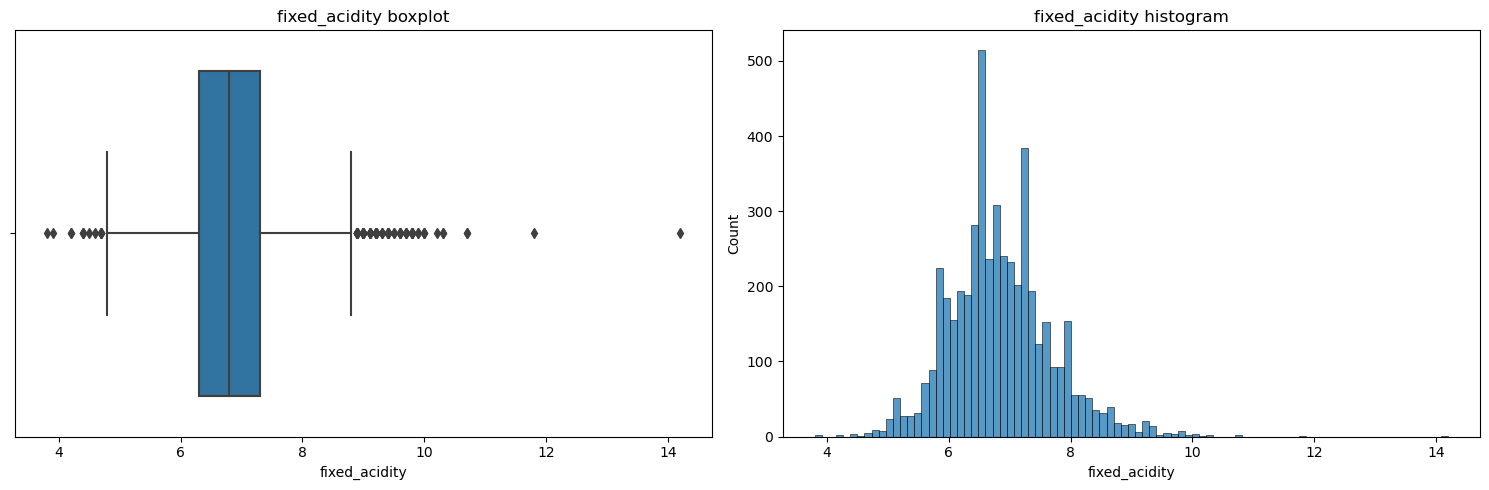

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['fixed_acidity'], ax=ax[0])
ax[0].set_title('fixed_acidity boxplot')

sns.histplot(data=df, x='fixed_acidity', ax=ax[1])
ax[1].set_title('fixed_acidity histogram')
plt.tight_layout()

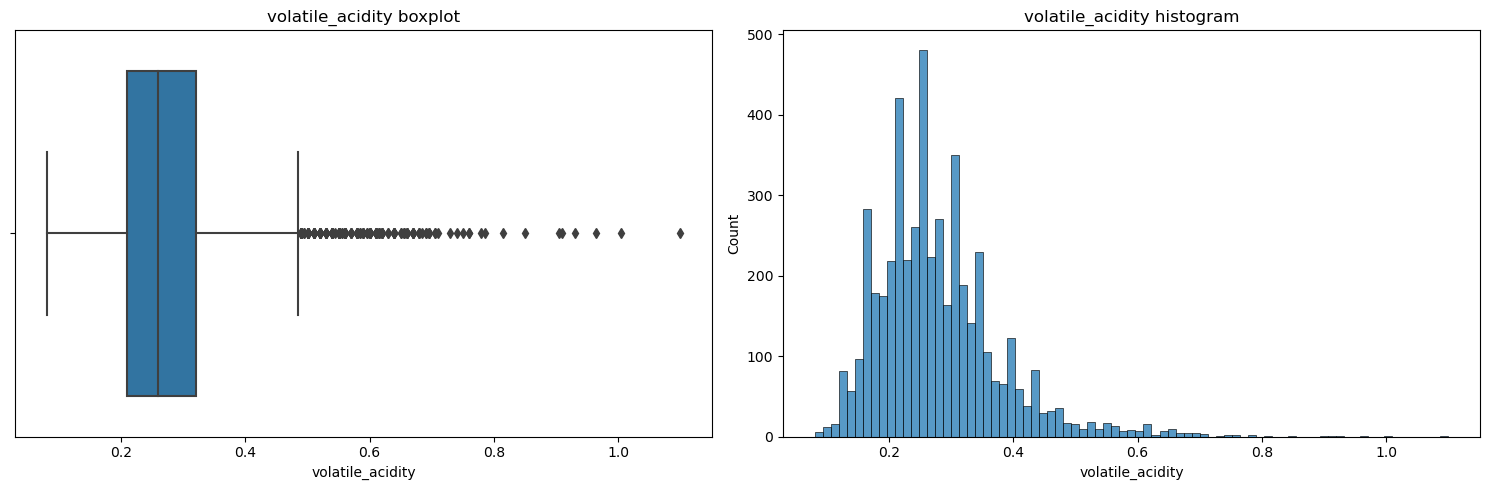

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['volatile_acidity'], ax=ax[0])
ax[0].set_title('volatile_acidity boxplot')

sns.histplot(data=df, x='volatile_acidity', ax=ax[1])
ax[1].set_title('volatile_acidity histogram')
plt.tight_layout()

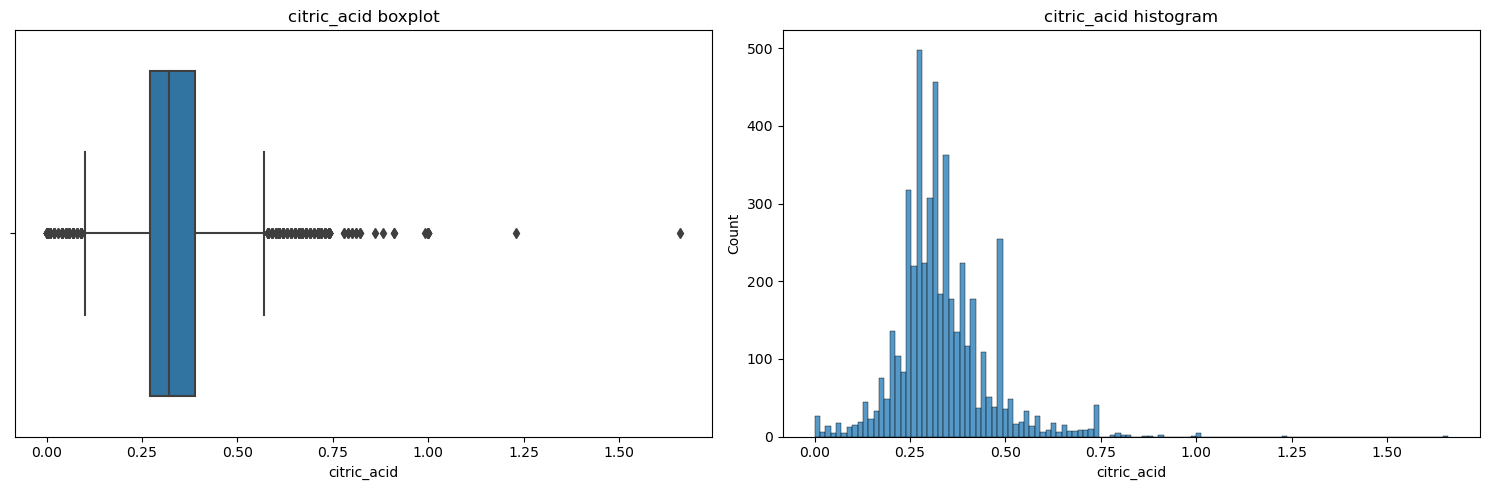

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['citric_acid'], ax=ax[0])
ax[0].set_title('citric_acid boxplot')

sns.histplot(data=df, x='citric_acid', ax=ax[1])
ax[1].set_title('citric_acid histogram')
plt.tight_layout()

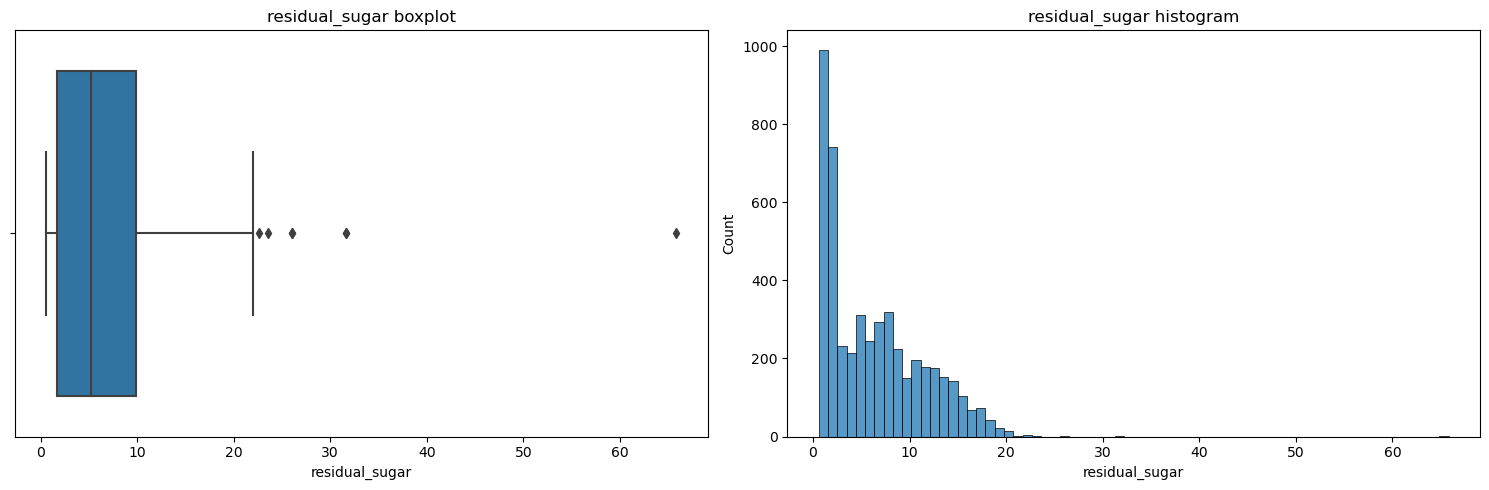

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['residual_sugar'], ax=ax[0])
ax[0].set_title('residual_sugar boxplot')

sns.histplot(data=df, x='residual_sugar', ax=ax[1])
ax[1].set_title('residual_sugar histogram')
plt.tight_layout()

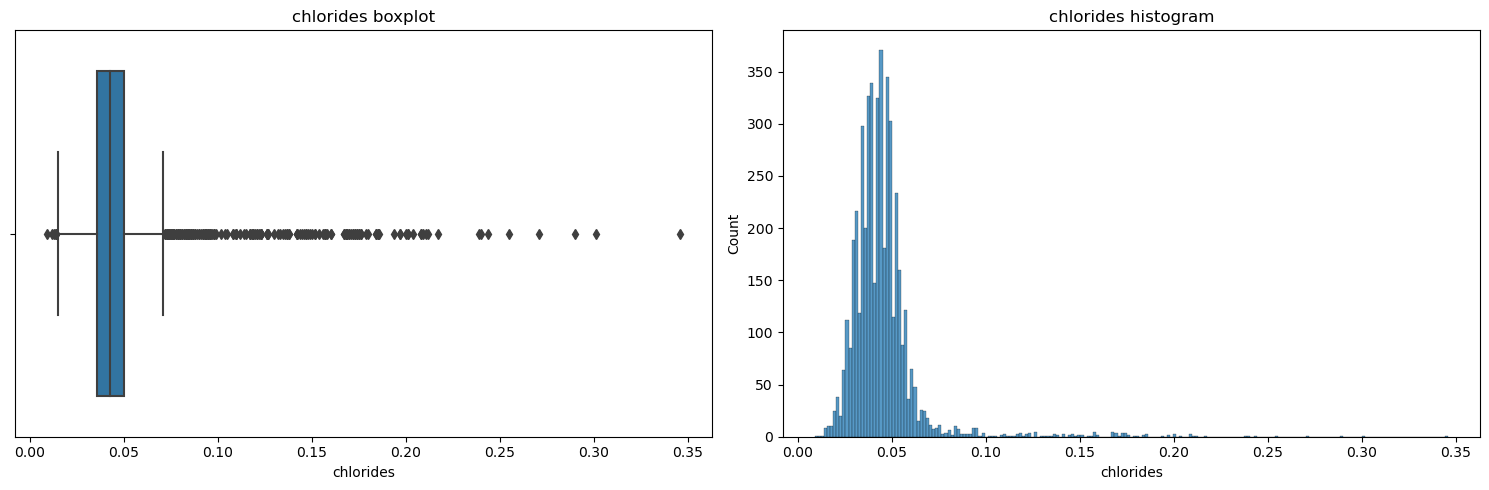

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['chlorides'], ax=ax[0])
ax[0].set_title('chlorides boxplot')

sns.histplot(data=df, x='chlorides', ax=ax[1])
ax[1].set_title('chlorides histogram')
plt.tight_layout()

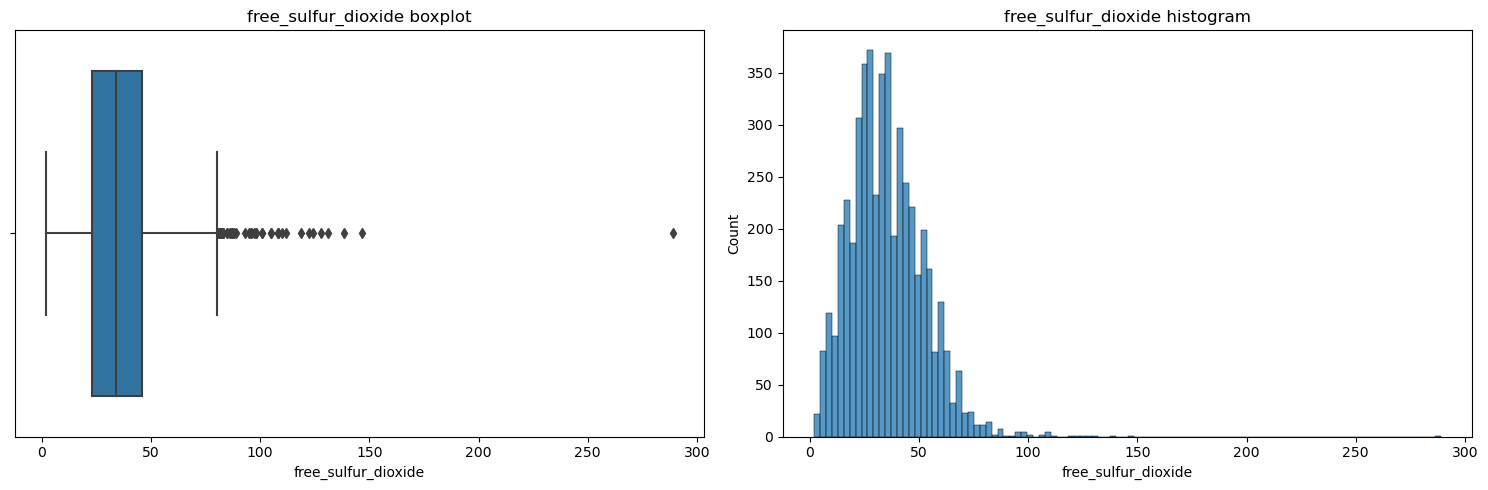

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['free_sulfur_dioxide'], ax=ax[0])
ax[0].set_title('free_sulfur_dioxide boxplot')

sns.histplot(data=df, x='free_sulfur_dioxide', ax=ax[1])
ax[1].set_title('free_sulfur_dioxide histogram')
plt.tight_layout()

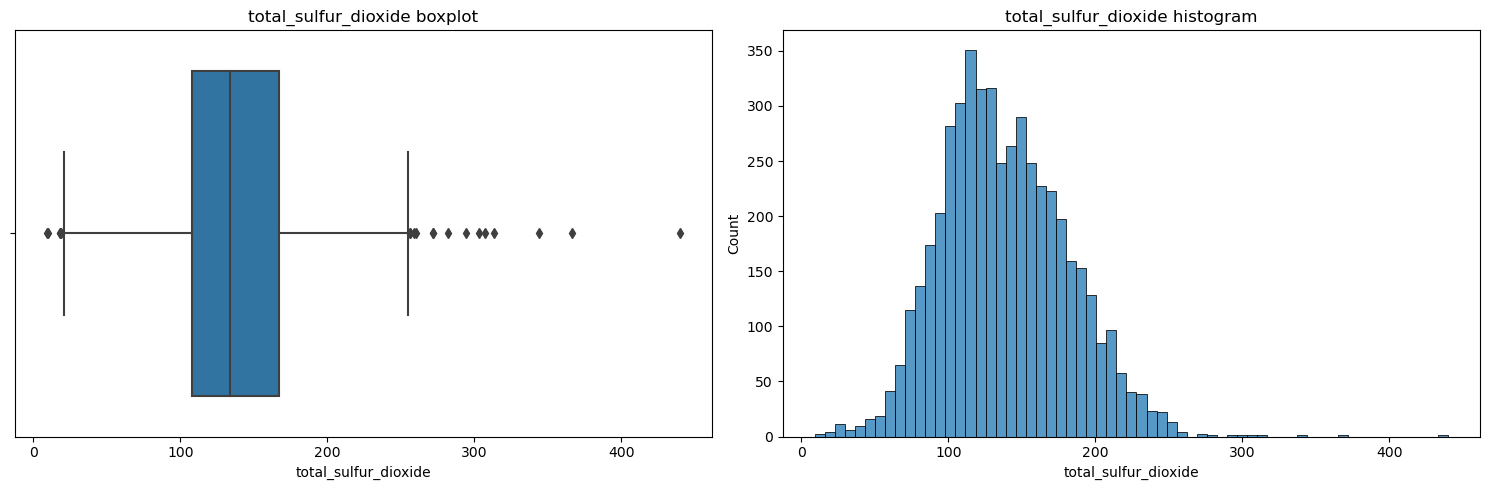

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['total_sulfur_dioxide'], ax=ax[0])
ax[0].set_title('total_sulfur_dioxide boxplot')

sns.histplot(data=df, x='total_sulfur_dioxide', ax=ax[1])
ax[1].set_title('total_sulfur_dioxide histogram')
plt.tight_layout()

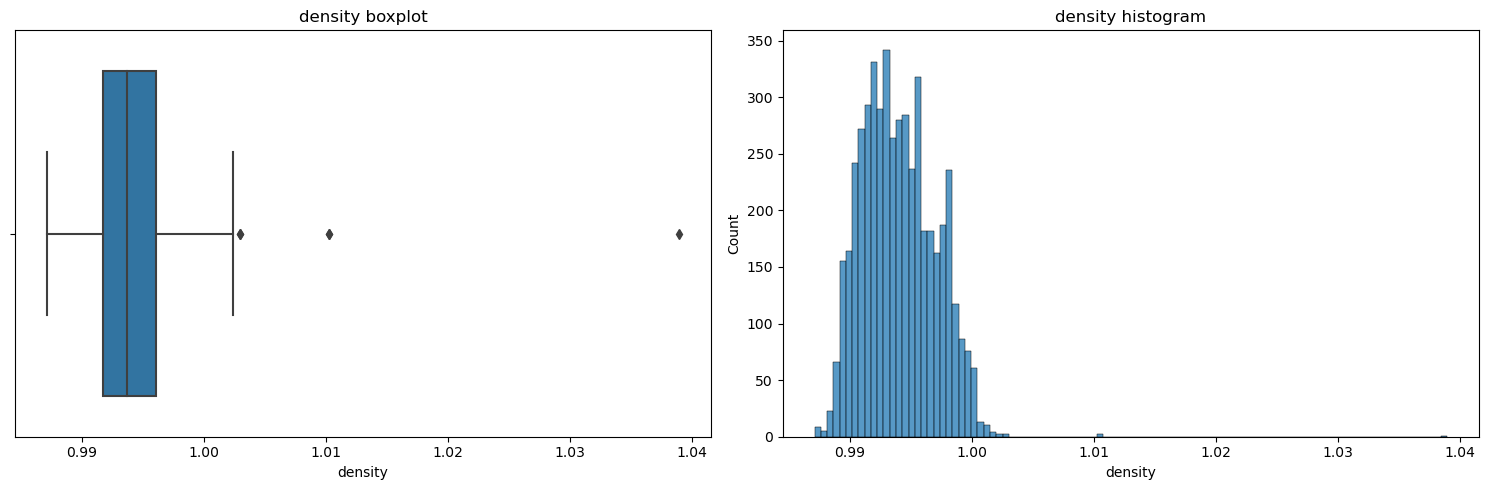

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['density'], ax=ax[0])
ax[0].set_title('density boxplot')

sns.histplot(data=df, x='density', ax=ax[1])
ax[1].set_title('density histogram')
plt.tight_layout()

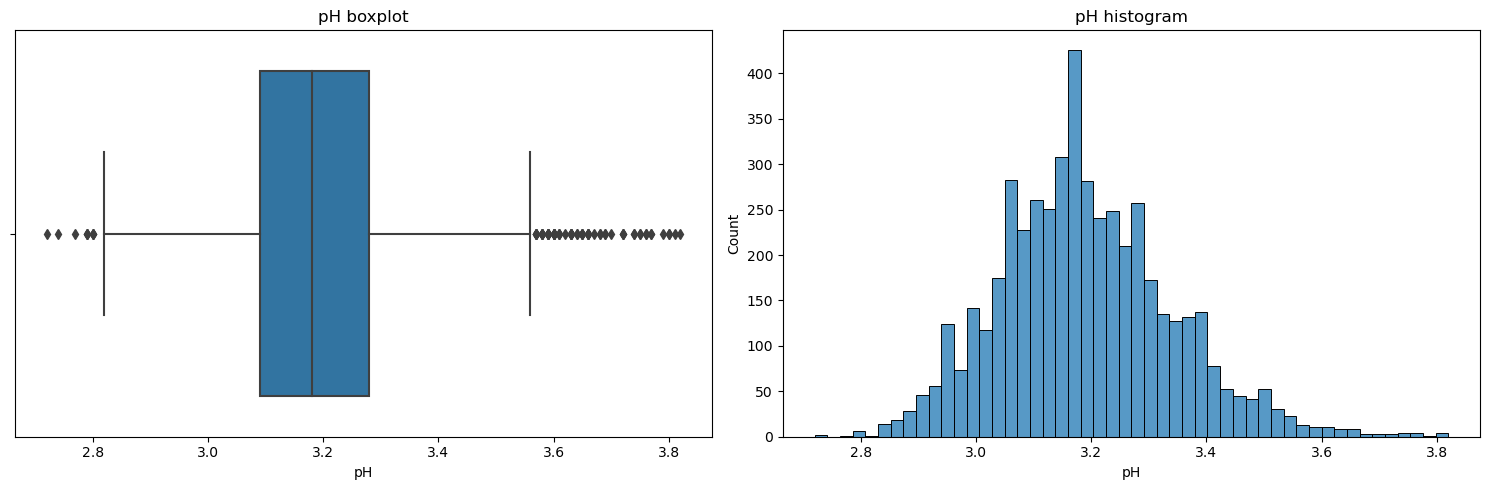

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['pH'], ax=ax[0])
ax[0].set_title('pH boxplot')

sns.histplot(data=df, x='pH', ax=ax[1])
ax[1].set_title('pH histogram')
plt.tight_layout()

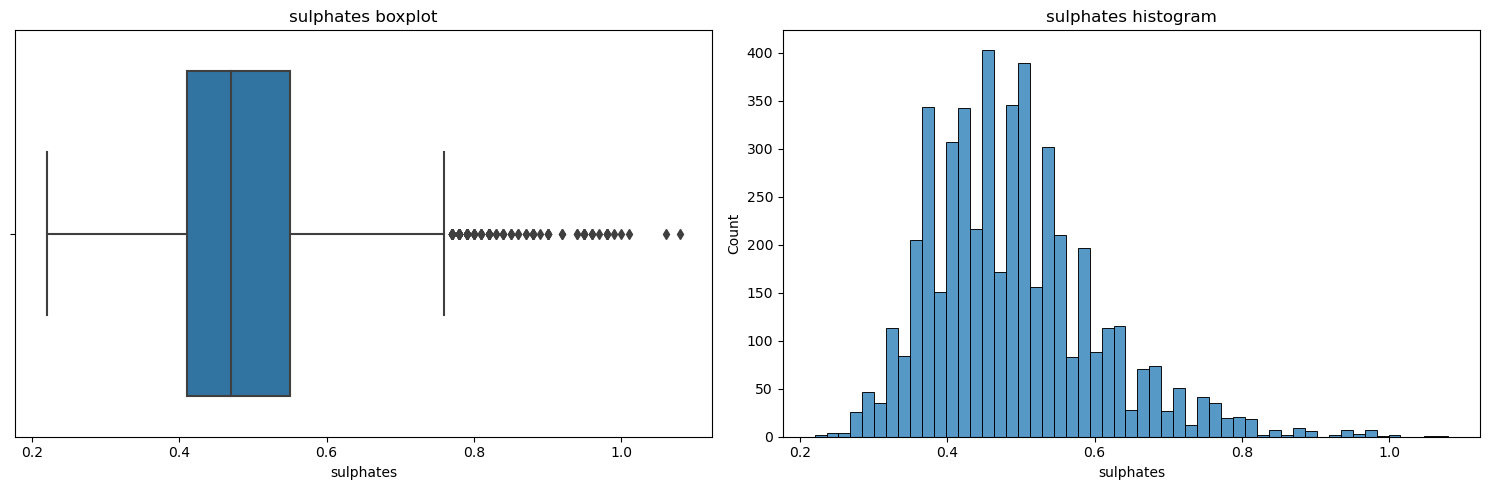

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['sulphates'], ax=ax[0])
ax[0].set_title('sulphates boxplot')

sns.histplot(data=df, x='sulphates', ax=ax[1])
ax[1].set_title('sulphates histogram')
plt.tight_layout()

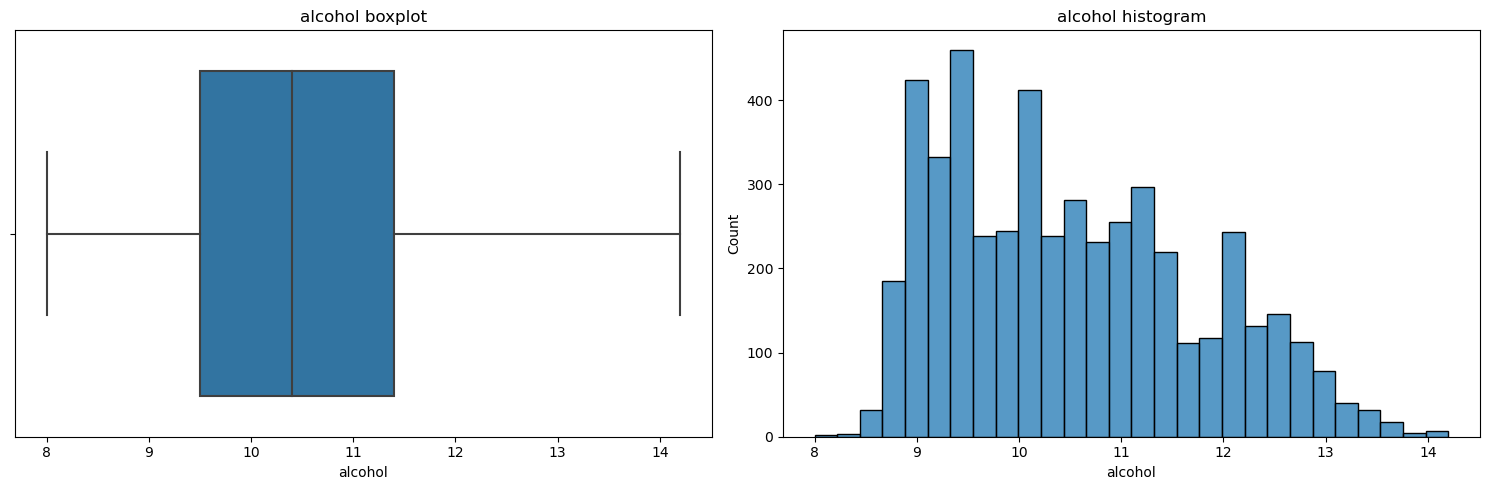

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['alcohol'], ax=ax[0])
ax[0].set_title('alcohol boxplot')

sns.histplot(data=df, x='alcohol', ax=ax[1])
ax[1].set_title('alcohol histogram')
plt.tight_layout()

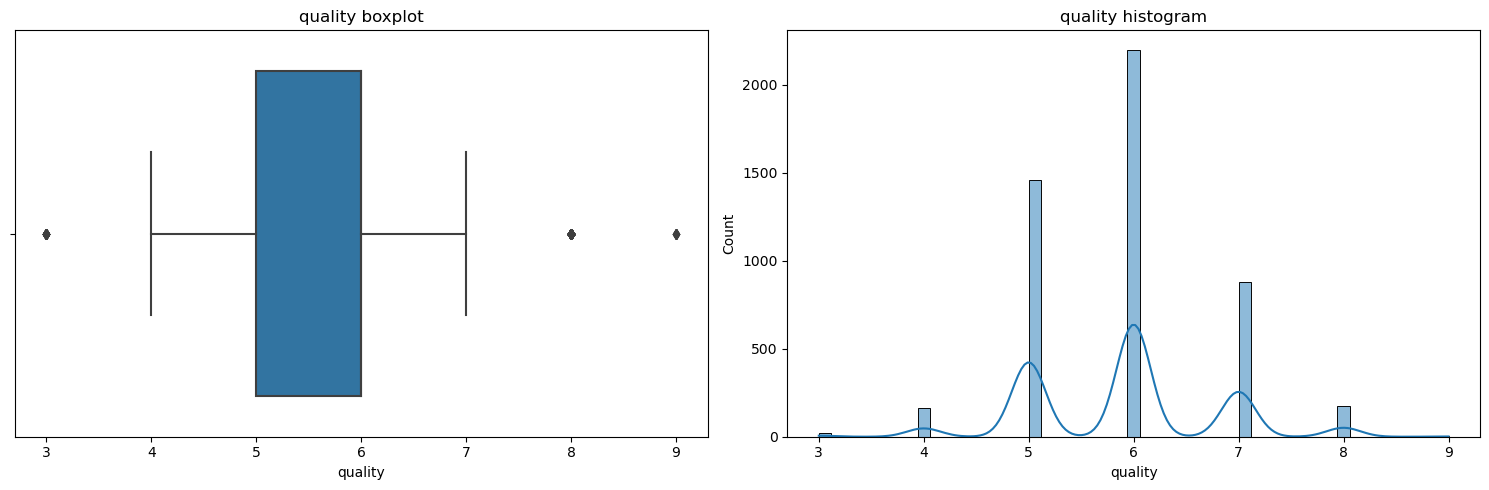

In [308]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['quality'], ax=ax[0])
ax[0].set_title('quality boxplot')

sns.histplot(data=df, x='quality', ax=ax[1], kde=True)
ax[1].set_title('quality histogram')
plt.tight_layout()

All of the variables have a roughly normal distribution with the exception of residual sugar, which has a right skewed distribution.

### Plot relationships and correlations between each variable

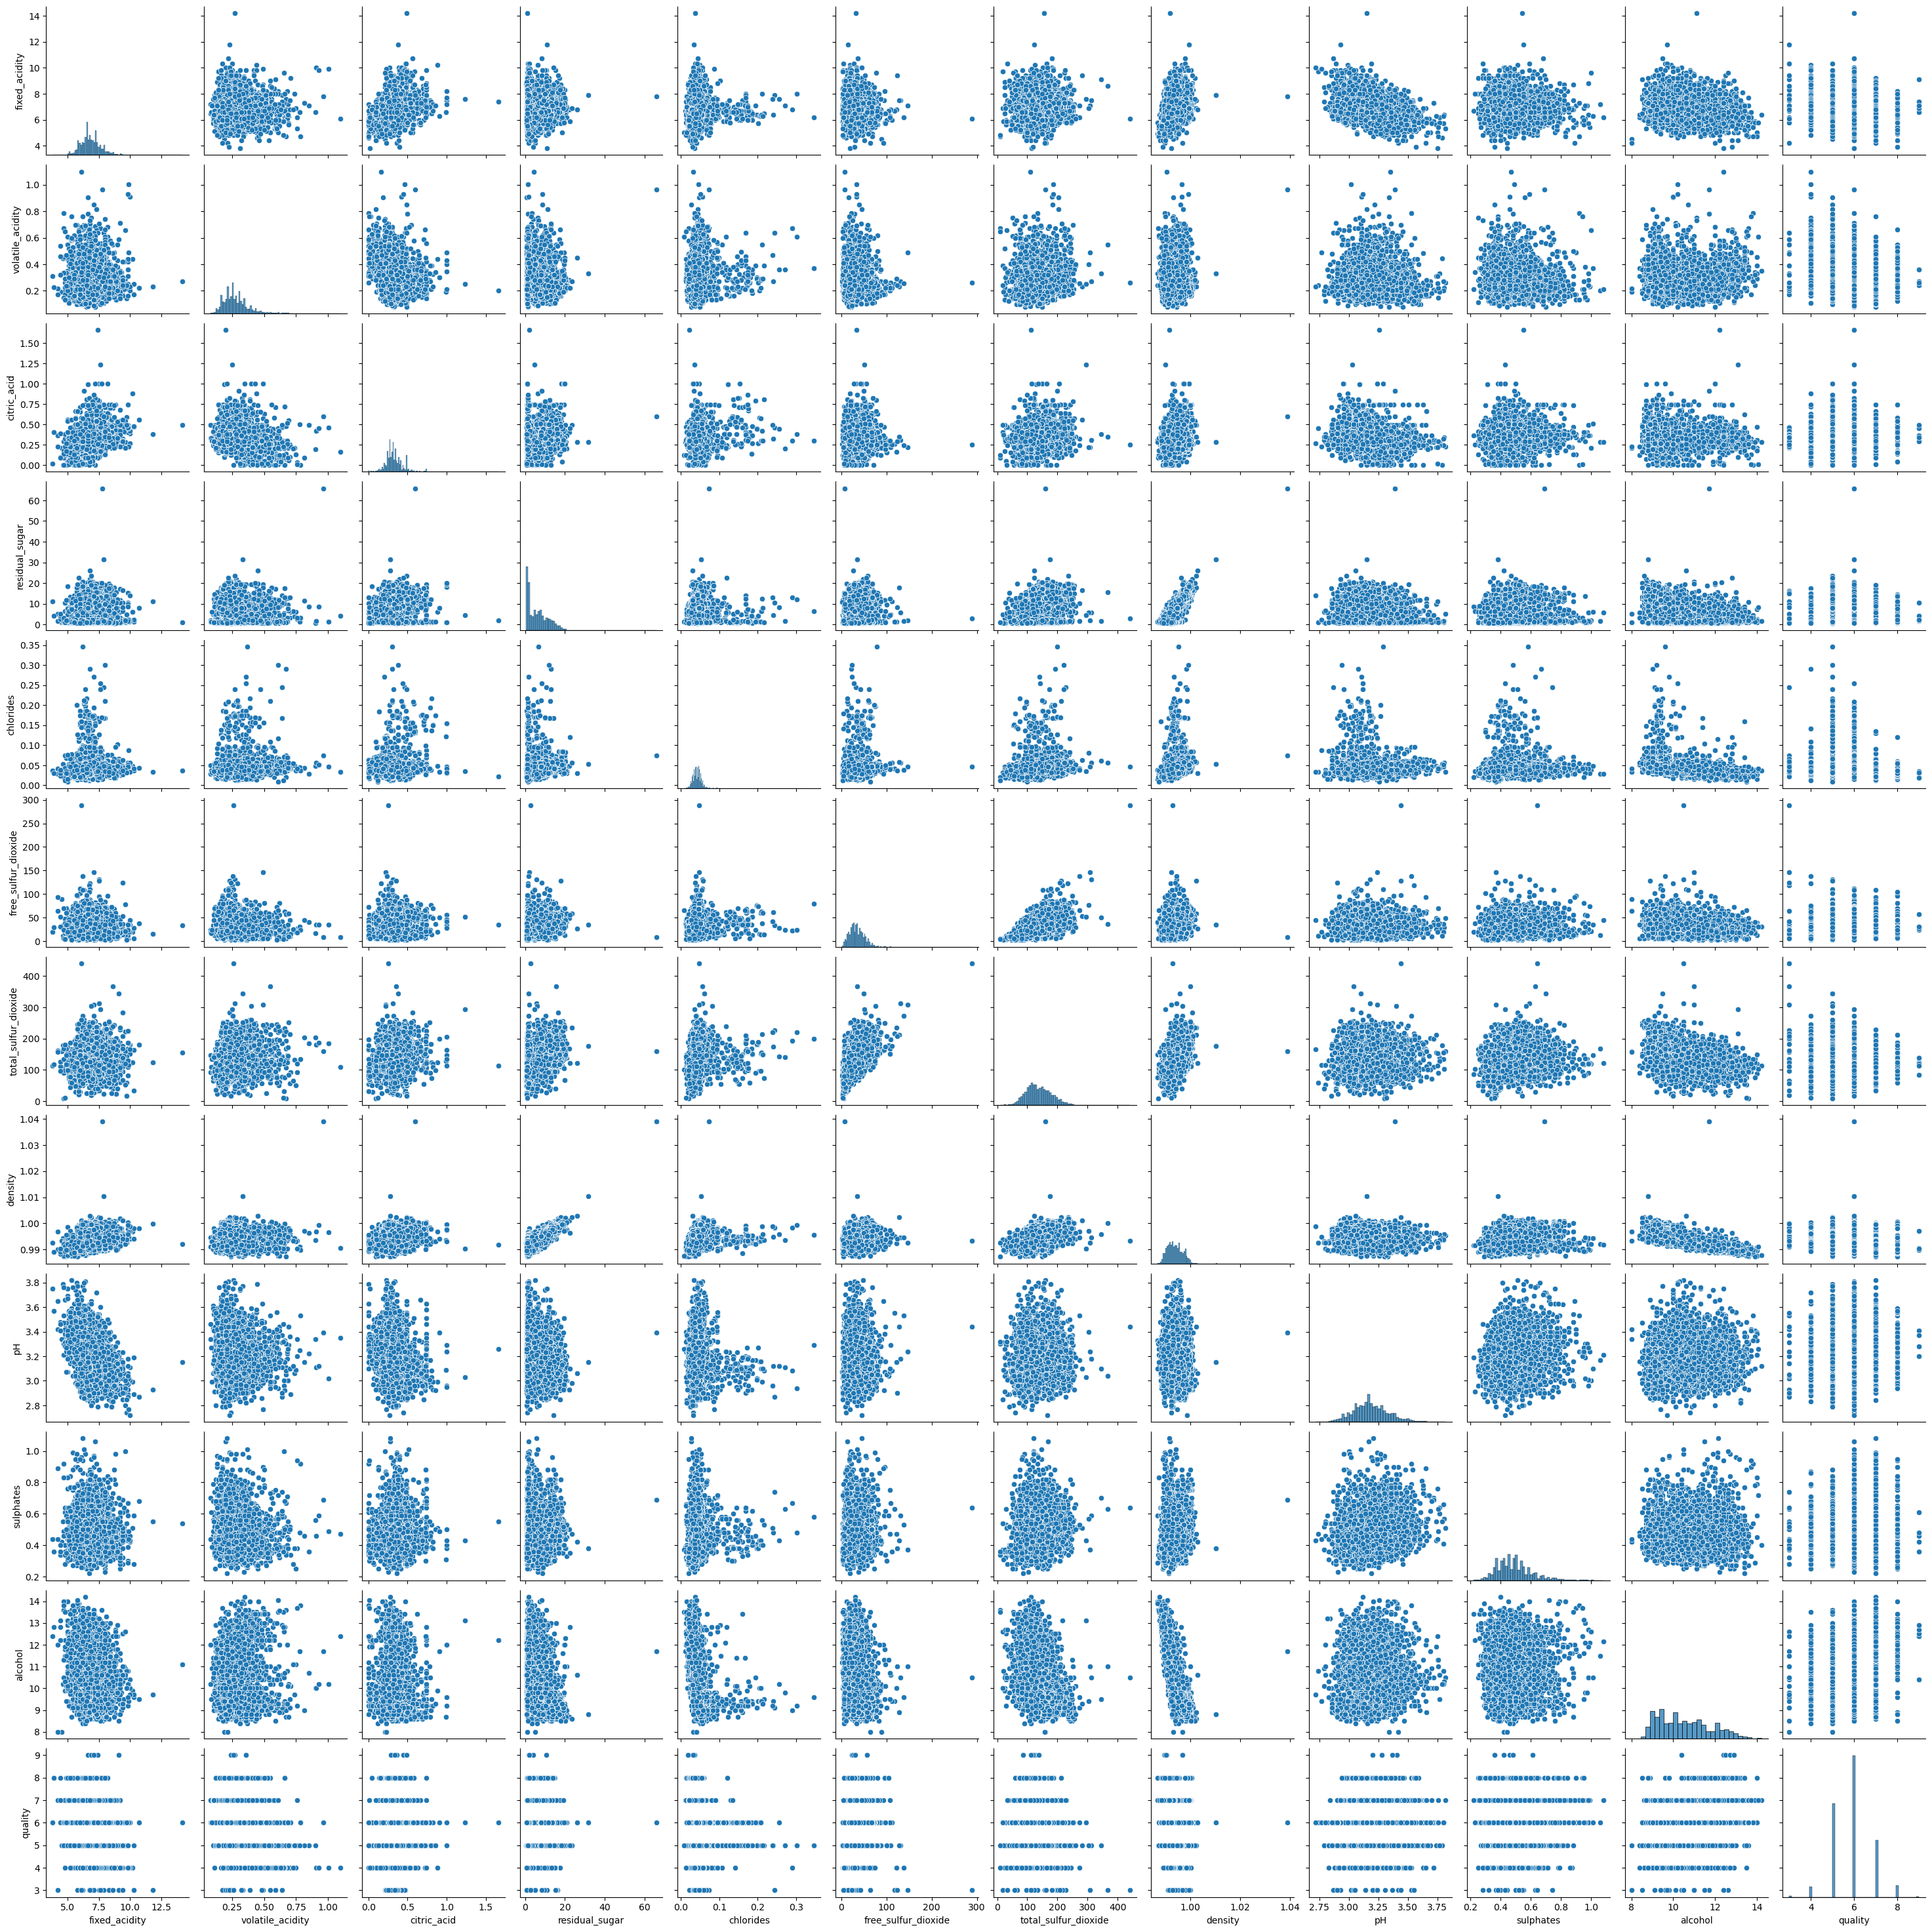

In [234]:
sns.pairplot(data=df)

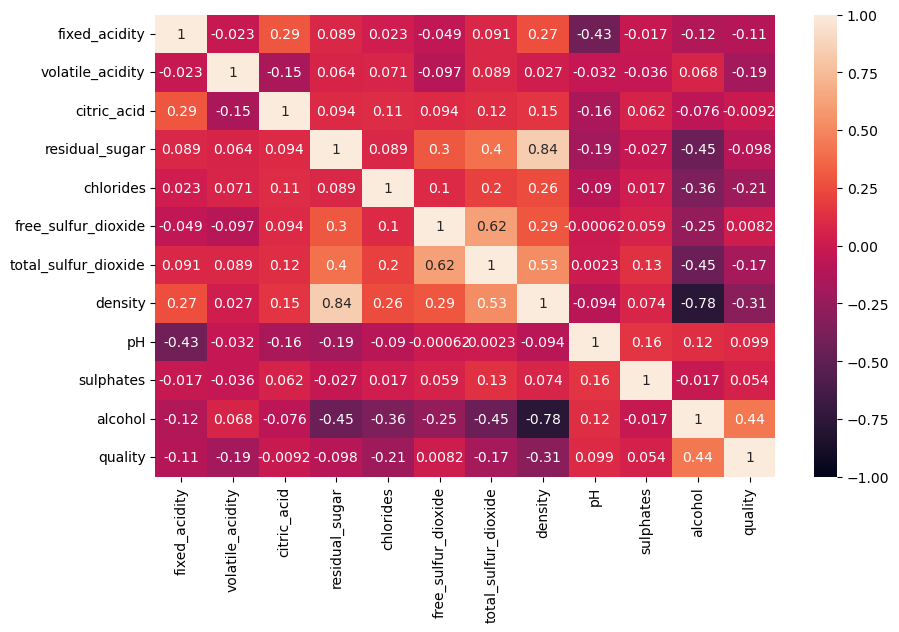

In [233]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Density and residual sugar are postively correlated with a coefficient of 0.84. Density and alcohol are negatively correlated with a coefficient of -0.78. This suggests that residual sugar and alcohol are strongly related to the density of the wines. This is reasonable because sugar is relatively more dense while alcohol is less dense in comparison to water.

From the heatmap, the variables that may affect the target variable, quality, is alcohol. The two variables have a mild positive correlation that suggests that higher alcohol content is associated with better quality wines.

## Model Construction

In [230]:
#variable selection
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3428, 11) (1470, 11) (3428,) (1470,)


### Multiple Polynomial Regression

In [418]:
#standardize input features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [419]:
#transform input features
pr = PolynomialFeatures(degree=2)
pr.fit(X_train_scaled)
X_train_pr = pr.transform(X_train_scaled)
X_test_pr = pr.transform(X_test_scaled)

In [420]:
#fit polynomial regression model
lm_pr = LinearRegression()
lm_pr.fit(X_train_pr, y_train)
y_pred_pr = lm_pr.predict(X_test_pr)

In [421]:
lm_pr.intercept_

5.972522001650776

In [422]:
lm_pr.coef_

array([-6.50539611e-18,  1.33918054e-01, -1.69360745e-01,  5.12904404e-03,
        4.21472621e-01, -8.94481644e-02,  1.40035336e-01, -2.78537272e-02,
       -5.18052286e-01,  1.22004136e-01,  6.75457458e-02,  1.17282751e-01,
       -2.05969982e-02, -1.48581175e-02,  3.16718413e-02,  3.92741256e-02,
       -2.14109414e-02, -6.38943085e-04, -2.89604695e-02, -8.78520657e-02,
        7.52032736e-02,  2.57467797e-02, -6.27014898e-02,  9.12052258e-03,
        2.01103057e-02, -2.39680903e-02, -1.44552335e-02,  1.49152042e-02,
        1.13278721e-02,  7.85423444e-03,  2.91265159e-02,  1.30850819e-03,
        5.94609403e-02, -1.38722692e-02,  2.83392993e-02,  1.22951897e-02,
        1.49933542e-02, -7.16926515e-03, -8.00661919e-02,  6.43039587e-02,
        2.43028567e-03, -3.07932196e-02, -1.12772020e-01, -5.53048123e-02,
       -1.00573488e-01, -1.17937320e-01,  9.78041967e-03,  9.43810735e-02,
       -6.68119053e-03, -2.34689934e-02,  7.18773022e-03, -1.10080962e-02,
       -7.59346939e-03,  

In [423]:
#save polynomial regression evluation metrics
pr_results = pd.DataFrame({
    'Model': ['Multiple Polynomial Regression'],
    'R2 Score': [r2_score(y_test, y_pred_pr)],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_pr)],
    'Mean Absolute Error': [mean_absolute_error(y_test, y_pred_pr)],
    'Root Mean Squared Error': [np.sqrt(mean_squared_error(y_test, y_pred_pr))],
})
pr_results

,Model,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,Multiple Polynomial Regression,0.212052,0.594926,0.558701,0.771315


### Decision Tree

In [399]:
#create decision tree with hyperparameter tuning
tree = DecisionTreeRegressor(random_state=42)
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_split': [2, 4, 6],
             'min_samples_leaf': [1, 3, 5]}

tree1 = GridSearchCV(tree, cv_params, cv=5)

In [262]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 2.7 s, sys: 92.3 ms, total: 2.79 s
Wall time: 2.91 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6]})

In [263]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [400]:
#use best parameters to train decision tree on entire training data sets
tree2 = DecisionTreeRegressor(max_depth=6, min_samples_leaf=1, min_samples_split=6, random_state=42)
tree2.fit(X_train, y_train)
print(tree2.score(X_train, y_train))
y_pred_tree = tree2.predict(X_test)

0.4244269875230482


In [401]:
#save decision tree evaluation metrics
tree_results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'R2 Score': [r2_score(y_test, y_pred_tree)],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_tree)],
    'Mean Absolute Error': [mean_absolute_error(y_test, y_pred_tree)],
    'Root Mean Squared Error': [np.sqrt(mean_squared_error(y_test, y_pred_tree))],
})
tree_results

,Model,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,Decision Tree,0.276714,0.546104,0.576506,0.738989


### Random Forest

In [403]:
#create random forest model with hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 300],
             }

rf1 = GridSearchCV(rf, cv_params, cv=5)

In [273]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 14min, sys: 9.75 s, total: 14min 10s
Wall time: 14min 21s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300]})

In [274]:
with open('white_wine_rf.pickle', 'wb') as to_write:
    pickle.dump(rf1, to_write)

In [275]:
with open('white_wine_rf.pickle', 'rb') as to_read:
    rf1 = pickle.load(to_read)

In [276]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [277]:
#use best parameters to train random forest model on entire training data sets
rf2 = RandomForestRegressor(max_depth=None, max_features=1.0,
                            max_samples=1.0, min_samples_leaf=1,
                            min_samples_split=2, n_estimators=300,
                            random_state=42)
rf2.fit(X_train, y_train)
print(rf2.score(X_train, y_train))
y_pred_rf = rf2.predict(X_test)

0.9325451319150546


In [281]:
#save random forest evaluation metrics
rf_results=pd.DataFrame({
    'Model': ['Random Forest'],
    'R2 Score': [r2_score(y_test, y_pred_rf)],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_rf)],
    'Mean Absolute Error': [mean_absolute_error(y_test, y_pred_rf)],
    'Root Mean Squared Error': [np.sqrt(mean_squared_error(y_test, y_pred_rf))]
})
rf_results

,Model,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,Random Forest,0.528551,0.355959,0.425342,0.596623


## Model Evaluation

### Distribution Plot

In [424]:
#combine actual and rounded predicted values into dataframe for respective models
y_pred_pr_rounded = np.round(y_pred_pr)
pr_outputs = pd.DataFrame({'Actual':y_test, 'Fitted':y_pred_pr_rounded})
pr_outputs = pr_outputs.reset_index(drop=True)

y_pred_tree_rounded = np.round(y_pred_tree)
tree_outputs = pd.DataFrame({'Actual':y_test, 'Fitted':y_pred_tree_rounded})
tree_outputs = tree_outputs.reset_index(drop=True)

y_pred_rf_rounded = np.round(y_pred_rf)
rf_outputs = pd.DataFrame({'Actual':y_test, 'Fitted':y_pred_rf_rounded})
rf_outputs = rf_outputs.reset_index(drop=True)

In [425]:
pr_outputs.describe()

,Actual,Fitted
count,1470.000000,1470.000000
mean,5.898639,5.870068
std,0.869222,0.736200
min,3.000000,-9.000000
25%,5.000000,6.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,8.000000,8.000000


In [426]:
tree_outputs.describe()

,Actual,Fitted
count,1470.000000,1470.000000
mean,5.898639,5.724490
std,0.869222,0.666937
min,3.000000,3.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,8.000000,8.000000


In [427]:
rf_outputs.describe()

,Actual,Fitted
count,1470.000000,1470.000000
mean,5.898639,5.891837
std,0.869222,0.697073
min,3.000000,4.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,6.000000,6.000000
max,8.000000,8.000000


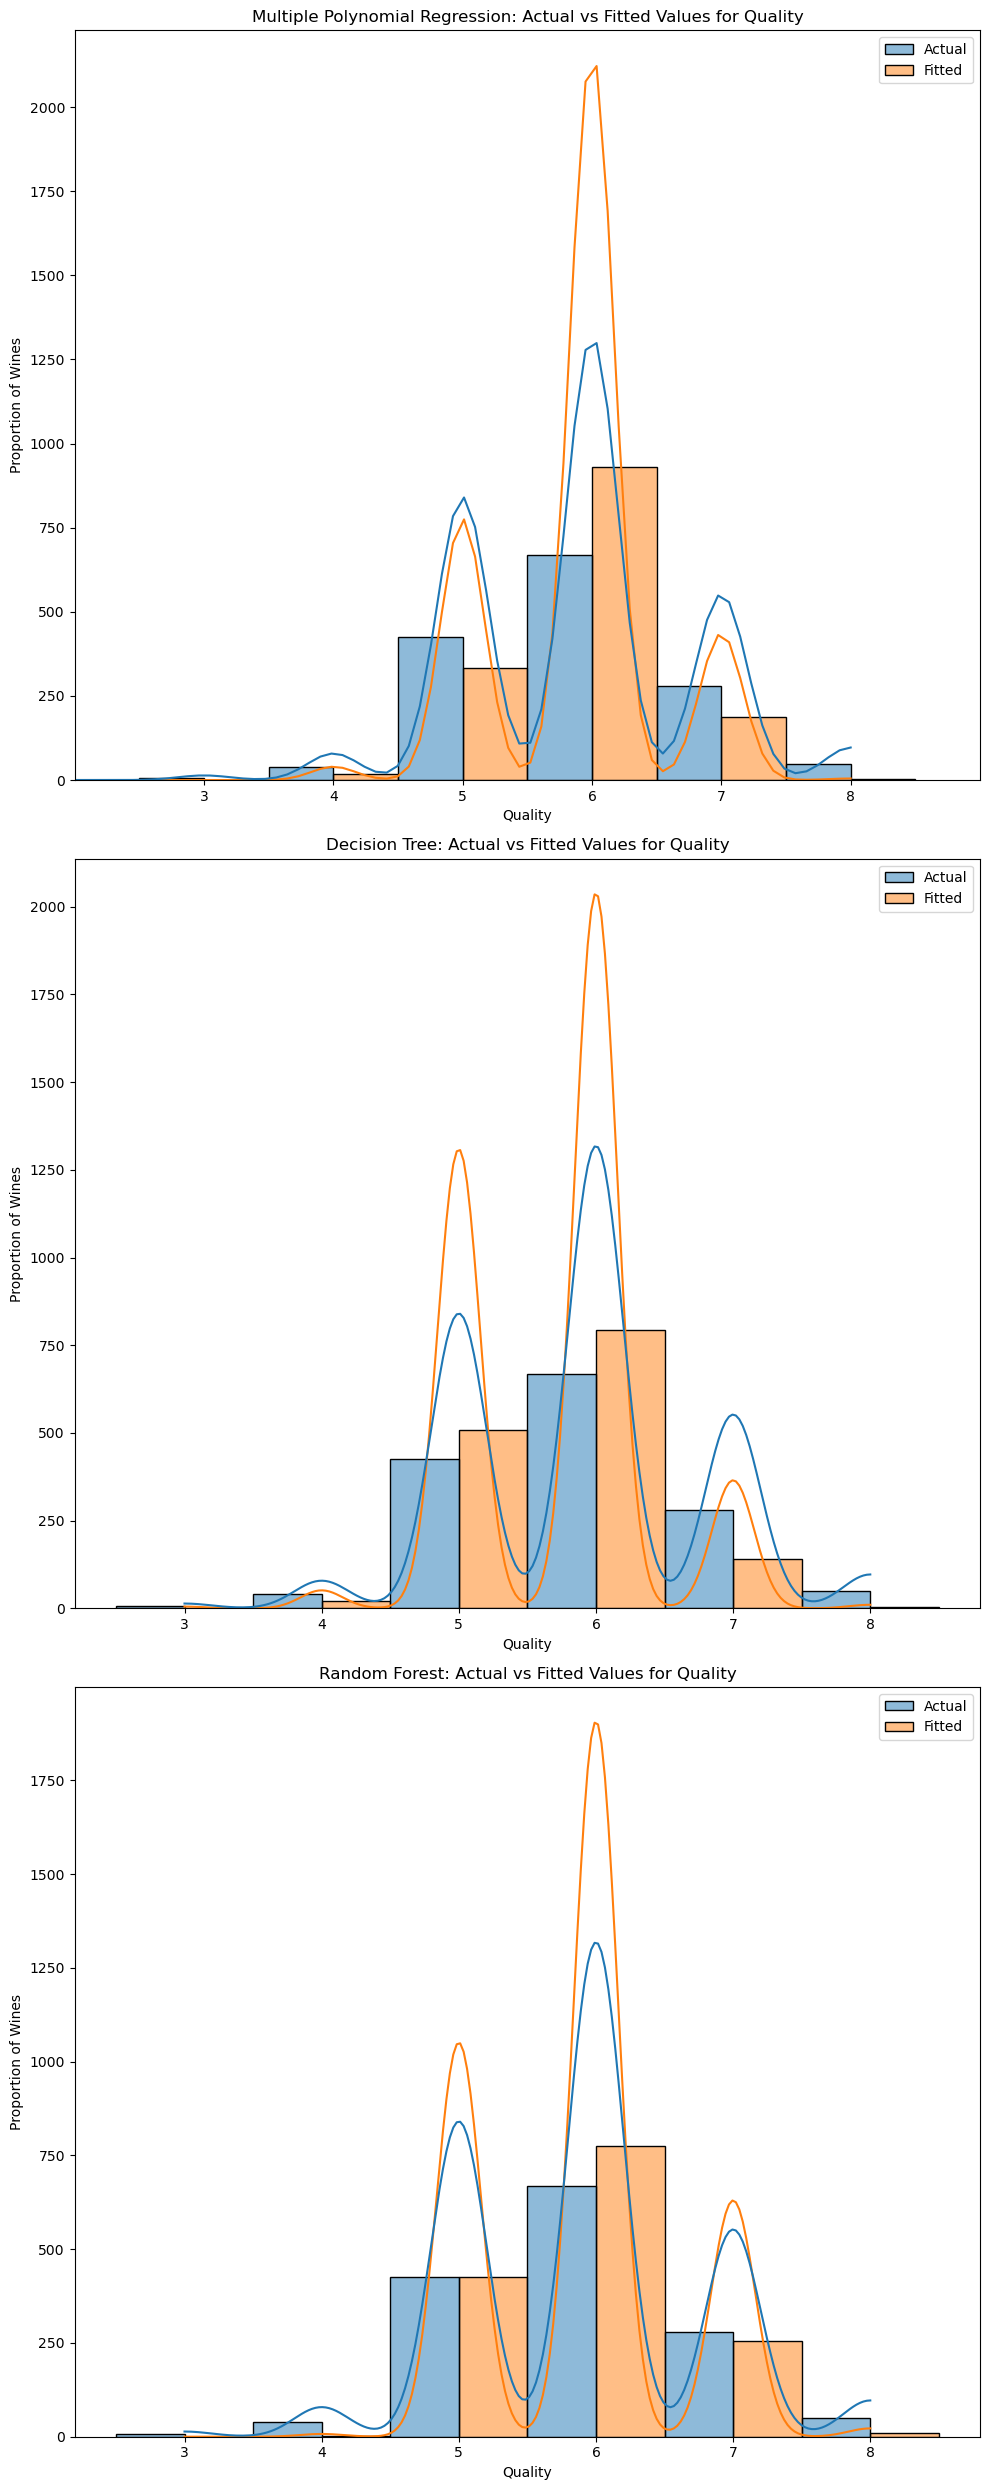

In [432]:
#plot distribution of actual and predicted y test data values
fig, ax = plt.subplots(3, 1, figsize=(10,25))

sns.histplot(data=pr_outputs, bins=range(3, 10), discrete=True, multiple='dodge', kde=True, ax=ax[0])
ax[0].set_title('Multiple Polynomial Regression: Actual vs Fitted Values for Quality')
ax[0].set_xlabel('Quality')
ax[0].set_ylabel('Proportion of Wines')
ax[0].set_xlim(left=2, right=9)
ax[0].set_xticks(range(3, 9))

sns.histplot(data=tree_outputs, bins=range(3, 9), discrete=True, multiple='dodge', kde=True, ax=ax[1])
ax[1].set_title('Decision Tree: Actual vs Fitted Values for Quality')
ax[1].set_xlabel('Quality')
ax[1].set_ylabel('Proportion of Wines')

sns.histplot(data=rf_outputs, bins=range(3, 9), discrete=True, multiple='dodge', kde=True, ax=ax[2])
ax[2].set_title('Random Forest: Actual vs Fitted Values for Quality')
ax[2].set_xlabel('Quality')
ax[2].set_ylabel('Proportion of Wines')
plt.tight_layout()

Comparing the three distribution plots, the kde curve of the fitted values most closely follows that of the actual values in the random forest model. The logistic regression model appears to be the least accurate, having predicted a negative value of -9 for one of the wines.

### Evaluation Metrics

In [429]:
#create table of evaluation metrics
results = pd.concat([pr_results, tree_results, rf_results], axis=0).reset_index(drop=True)
results

,Model,R2 Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
0,Multiple Polynomial Regression,0.212052,0.594926,0.558701,0.771315
1,Decision Tree,0.276714,0.546104,0.576506,0.738989
2,Random Forest,0.528551,0.355959,0.425342,0.596623


The random forest model outperformed both models, with the highest R2 score and lowest MSE, MAE, and RMSE. The polynomial regression model and decision tree had similar evaluation metrics, but the decision tree performed slightly better.

### Feature Importances

In [304]:
#extract and sort feature importances
tree_importances = pd.DataFrame(tree2.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)

In [305]:
rf_importances = pd.DataFrame(rf2.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf_importances = rf_importances.sort_values(by='gini_importance', ascending=False)

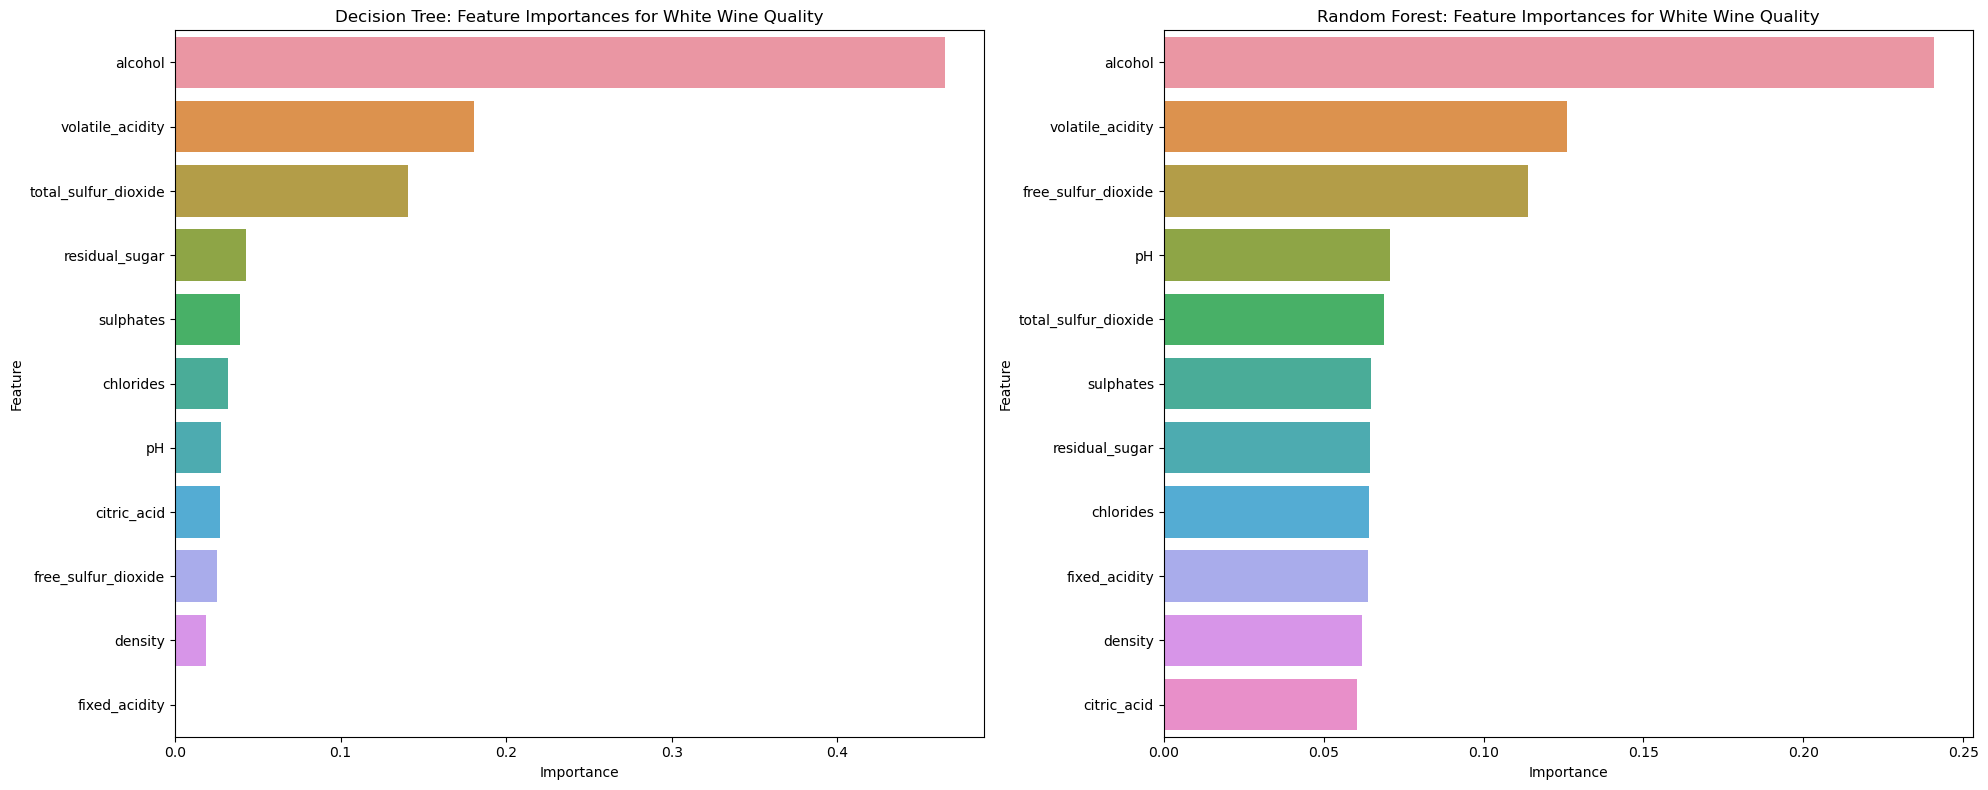

In [306]:
#plot feature importances
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.barplot(data=tree_importances, x="gini_importance", y=tree1_importances.index, orient='h', ax=ax[0])
ax[0].set_title("Decision Tree: Feature Importances for White Wine Quality", fontsize=12)
ax[0].set_ylabel("Feature")
ax[0].set_xlabel("Importance")

sns.barplot(data=rf_importances, x="gini_importance", y=rf_importances.index, orient='h', ax=ax[1])
ax[1].set_title("Random Forest: Feature Importances for White Wine Quality", fontsize=12)
ax[1].set_ylabel("Feature")
ax[1].set_xlabel("Importance")

plt.tight_layout()

The feature importances of both the decision tree and random forest model reveal that alcohol is the most important variable in predicting white wine quality, followed by volatile acidity and free sulfur dioxide. This is also supported by the EDA finding that quality is the most strongly correlated with alcohol.

In the decision tree model, the gini importance of alcohol is more than double that of the next most important feature, volatile acidity. However, in the random forest model, alcohol and volatile acidity are closer in importance, with the other features having slightly higher gini importances as well. This suggests that in predicting white wine quality, a more accurate prediction takes more into account the other features of wine, rather than basing it mostly on a few variables.

## Conclusion

The random forest model produced the most accurate results in predicting white wine quality based on the various characteristcs of wine. While alcohol is the biggest factor in determining the quality of the wine, it is not the sole predictor as seen in the feature importances.